In [19]:
import numpy as np
import numpy.random as ra
import matplotlib.pyplot as plt

def BrownianMotion(stepsize=0.01, time=1):
    return np.concatenate(([0], np.cumsum(ra.normal(scale=np.sqrt(stepsize), size=int(time/stepsize)))))

def EulerMaruyama(sigma, mu, x0, dt=0.01, T=1):
    X = [x0]
    for _ in range(int(T / dt)):
        dB = ra.normal(scale=np.sqrt(dt))
        X.append(
            X[-1]
            + sigma(X[-1]) * dB
            + mu(X[-1]) * dt
        )
    return X

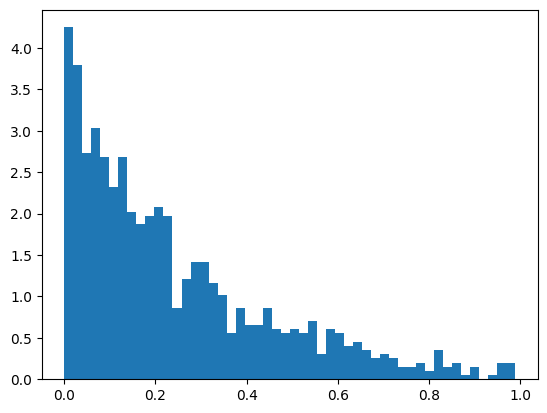

In [4]:
# Sampling bias of a uniform variable

sample = ra.uniform(size=100000)
p = np.array([np.exp(-3.6 * x) for x in sample])
p = p / np.sum(p)
subsample = ra.choice(sample, size=1000, p=p)
plt.hist(subsample, bins=50, density=True)
plt.show()

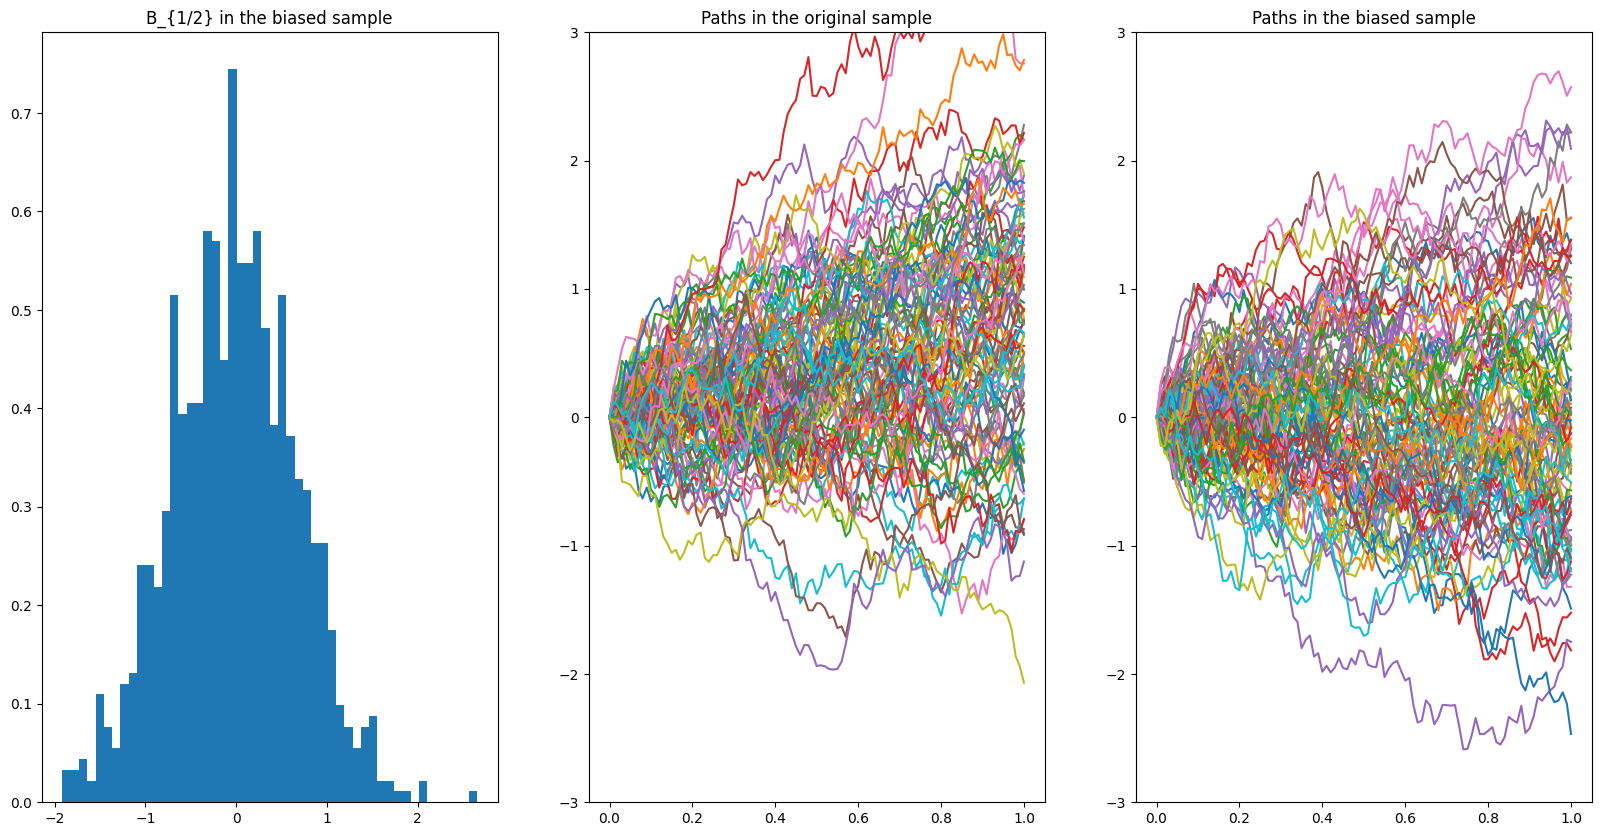

In [16]:
# Sampling bias a la Cameron-Martin

T = np.arange(0, 1+0.01, 0.01)
sample = [BrownianMotion() + T for _ in range(100000)]

p = np.array([np.exp(-B[-1] + 0.5) for B in sample])
p = p / np.sum(p)

subsample = [sample[i] for i in ra.choice(100000, size=1000, p=p)]

plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title("B_{1/2} in the biased sample")
plt.hist([B[50] for B in subsample], density=True, bins=50)

plt.subplot(1,3,2)
plt.ylim(-3,3)
plt.title("Paths in the original sample")
for i in range(100):
    plt.plot(T, sample[i])

plt.subplot(1,3,3)
plt.ylim(-3,3)
plt.title("Paths in the biased sample")
for i in range(100):
    plt.plot(T, subsample[i])

plt.show()

In [34]:
# Integrals

def ItoIntegral(Y, B, stepsize=0.01):
    increments = [0] + [Y[i] * (B[i+1] - B[i]) for i in range(len(B)-1)]
    return np.sum(increments)

def Integral(Y, stepsize=0.01):
    increments = [0] + [Y[i] * stepsize for i in range(len(Y)-1)]
    return np.sum(increments)

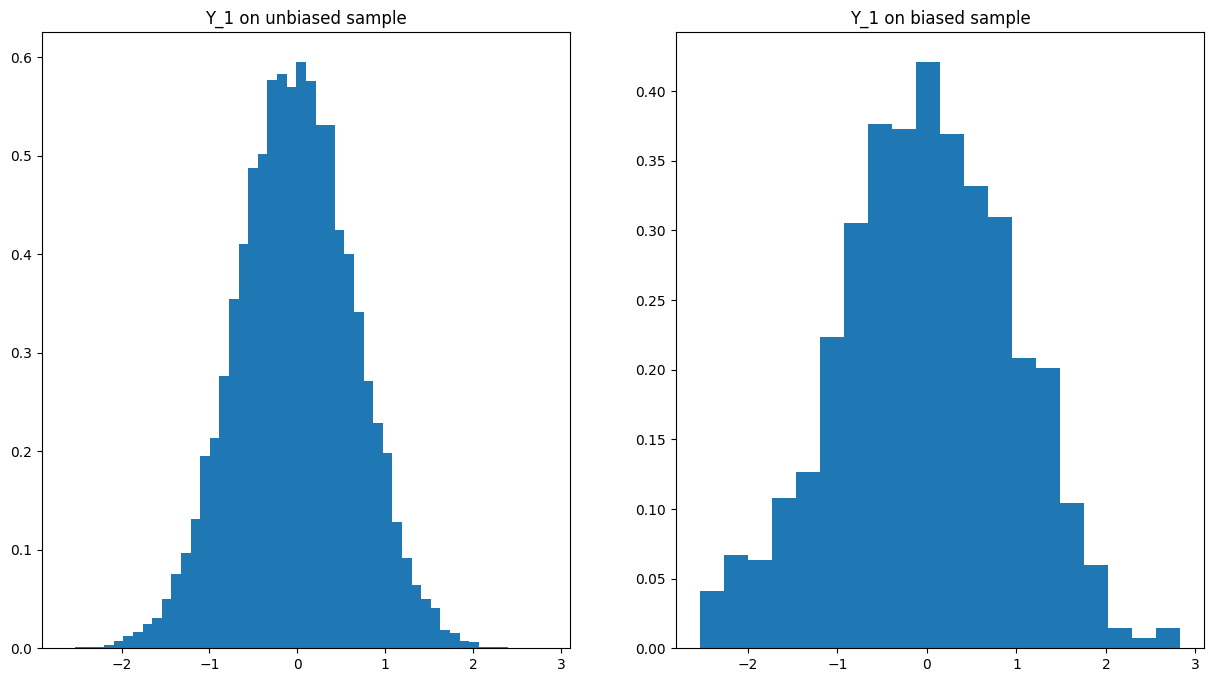

Unbiased sample variance: 0.4386082437396825
Biased sample variance: 0.9375196180810926


In [41]:
# Samlping bias a la Girsanov

N = 100000
n = 1000

T = np.arange(0,1.01,0.01)

browns = np.zeros((N, 101))
sample = np.zeros((N, 101))

for i in range(N):
    s = ra.randint(2**30)
    ra.seed(s)
    browns[i]= EulerMaruyama(lambda x : 1, lambda x : 0, 0)
    ra.seed(s)
    sample[i] = EulerMaruyama(lambda x : 1, lambda x : -x, 0)

p = [np.exp(ItoIntegral(sample[i], browns[i]) - 0.5 * Integral(sample[i]**2)) for i in range(N)]
p = np.array(p) / np.sum(p)

subsample = [sample[i] for i in ra.choice(N, size=n, p=p)]

sampleends = np.array([Y[-1] for Y in sample])
subsampleends = np.array([Y[-1] for Y in subsample])

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.title("Y_1 on unbiased sample")
plt.hist(sampleends, density=True, bins=50)

plt.subplot(1,2,2)
plt.title("Y_1 on biased sample")
plt.hist(subsampleends, density=True, bins=20)

plt.show()

print(f"Unbiased sample variance: {np.var(sampleends)}")
print(f"Biased sample variance: {np.var(subsampleends)}")